In [1]:
## Homework Set #2
## Nonlinear Dynamics & Chaos -- Spring 2021
## Abhiram Kakuturu
# Full source is available at https://github.com/abhivk23/nonlinear-dynamics
import hw2

# LOGISTIC MAP
## Superattractors
First, we quickly determine the fixed points of the logistic map $F(x)=cx(1-x) \space \forall \space c : (1,3]$:
$$
x^* = cx^*(1-x^*)
\implies c(x^*)^2 = x^*(c-1)
\implies x^* = 0, \frac{c-1}{c}
$$
**(a)** Analytically, we predict a fixed point to be a *superattractor* or *superstable* when $F`(x^*)=c(1-2x^*)=0$. Since the only fixed point that satisfies this condition is $x^*=\frac{1}{2}$, we expect a superattractor at 0.5 for c=2. If we compare the convergence of errors for c=2 and c=3, this is exactly the behavior we get.

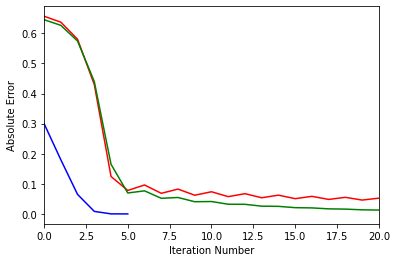

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate mapping trajectories and associated errors for c=2,3
c3, c3_errors = hw2.logistic_map(3, 0.01)
c2, c2_errors = hw2.logistic_map(2, 0.2)
c29, c29_errors = hw2.logistic_map(2.9, 0.01)

# Plot the convergence of errors for c=2
x2 = np.arange(0, len(c2_errors), 1)
x3 = np.arange(0, len(c3_errors), 1)
x29 = np.arange(0, len(c29_errors), 1)
plt.plot(x2, c2_errors, 'b')
plt.plot(x3, c3_errors, 'r')
plt.plot(x29, c29_errors, 'g')

plt.xlim(0,20)
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.show()

**(b)** The next couple plots show the different rates of convergence given different parameters c.

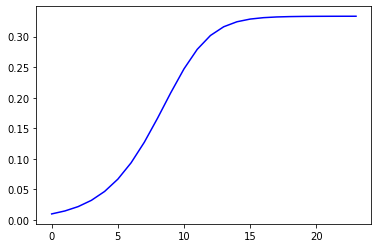

In [3]:
# 1 < c < 2 (c=1.5)
c15, c15_errors = hw2.logistic_map(1.5, 0.01)
x = np.arange(0, len(c15), 1)
plt.plot(x, c15, 'b')
plt.show()

In [4]:
def cobweb(traj, c, x_0, crit_interv):
    """
    Cobweb analysis plotter.
    """
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    # F(x)
    x = np.arange(0, 1, 0.01)
    F = c*x*(1-x)
    ax[0].plot(x, F, 'r', label='F(x)')
    ax[1].plot(x, F, 'r', label='F(x)')

    # Unit Diagonal
    unit_diag = x
    ax[0].plot(x, unit_diag, 'b', label='unit diagonal')
    ax[1].plot(x, unit_diag, 'b', label='unit diagonal')

    # Iterates 
    traj.insert(0,0.)
    f_map = [val for val in traj for _ in (0, 1)] # double each value
    ax[0].plot(f_map[:-1], f_map[1:], 'g', label='cobweb')
    ax[1].plot(f_map[:-1], f_map[1:], 'g', label='cobweb')

    ax[1].set_xlim(crit_interv)
    ax[1].set_ylim(crit_interv) # zoomed in on critical region

    ax[0].set_title("c="+str(c)+" with x_0="+str(x_0))
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("F(x)=cx(1-x)")
    ax[1].set_title("(spiral behavior close-up)")
    plt.legend()

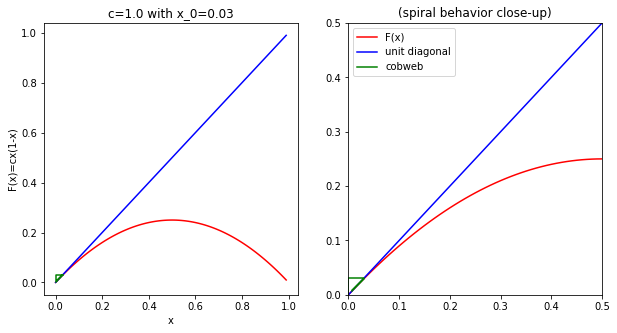

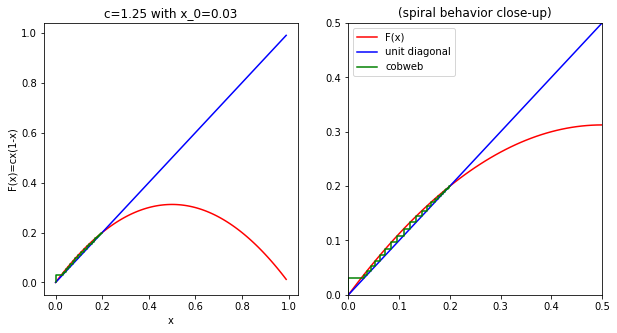

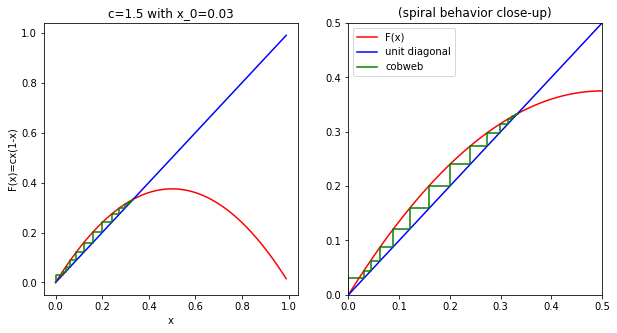

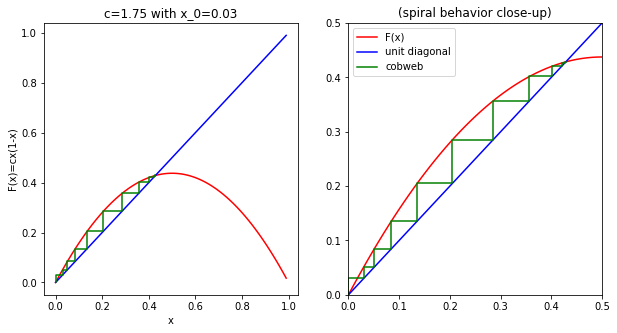

In [5]:
# 1 < c < 2
x_0 = 0.03
for c in np.arange(1,2,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.,0.5])

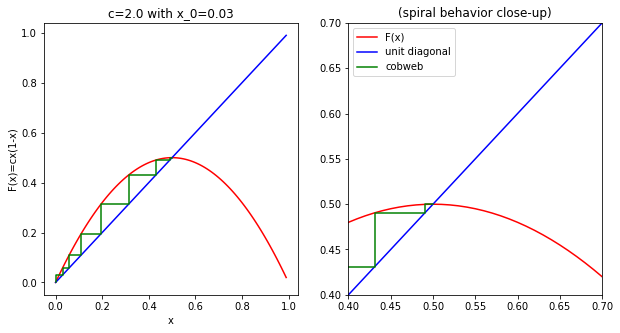

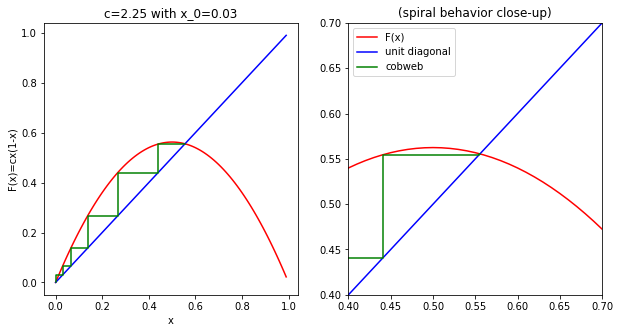

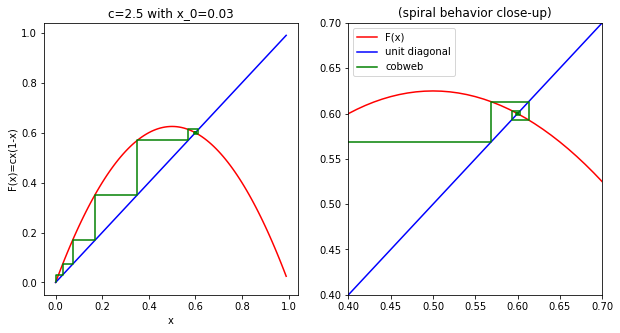

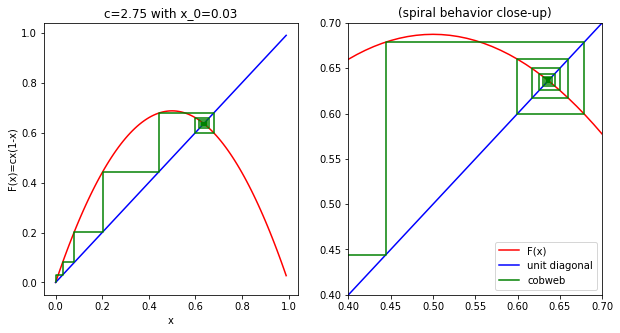

In [6]:
# 2 < c < 3
x_0 = 0.03
for c in np.arange(2,3,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.4,0.7])

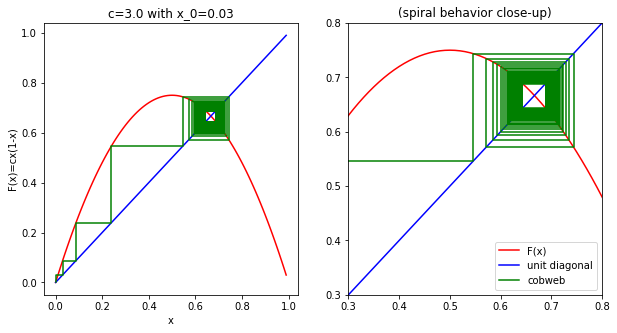

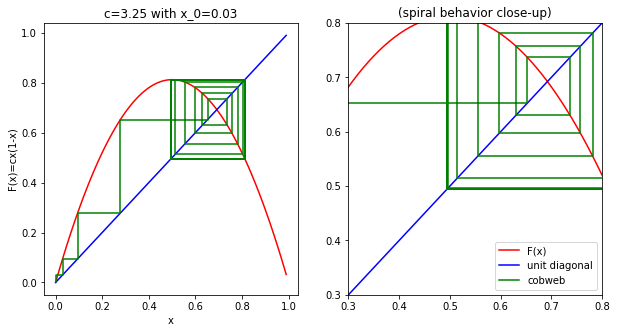

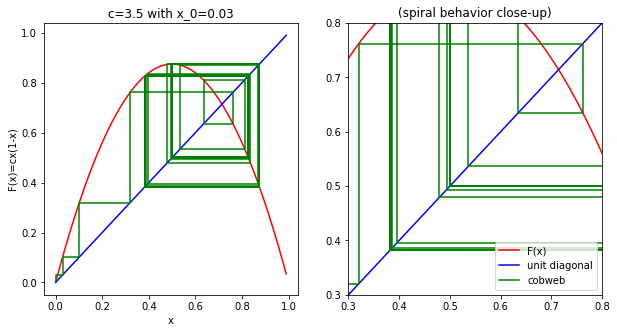

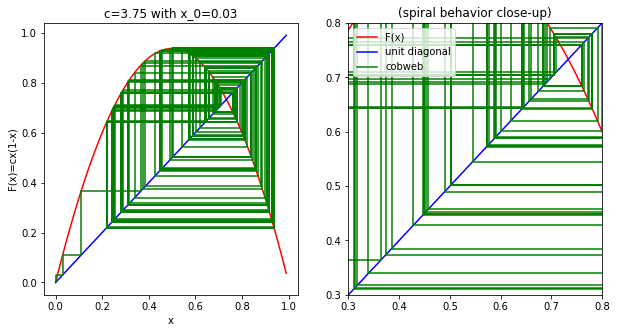

In [7]:
# c >= 3
x_0 = 0.03
for c in np.arange(3,4,0.25):
    traj, traj_errors = hw2.logistic_map(c, x_0, n=100)
    cobweb(traj,c,x_0, [0.3,0.8])

To show that the domain of attraction is the 

In [8]:
traj3 = hw2.logistic_map(2.7,0.01)[0]
x = np.arange(0,len(traj3))
plt.plot(x, traj3)

def animate2(i):
    ax1.clear()
    ax1.plot(test_data[0:i, 0], test_data[0:i, 1])

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# create animation
animation.FuncAnimation(fig, animate2, frames=range(1, len(various_c)), interval=1000, repeat=False)

# start animation
plt.show()

NameError: name 'animation' is not defined

# LOGISTIC 2-CYCLE
**(a)** The last 50 iterations of the map of c=3 (below) reveal a stable 2-cycle between the points 0.67 and 0.66. Going from a convergence on a single value, the attractor of the configuration,when c=3 to convergence on a 2-cycle indicates a period doubling bifurcation. 

0
1
2
3
4
5
6
7
8
9
10


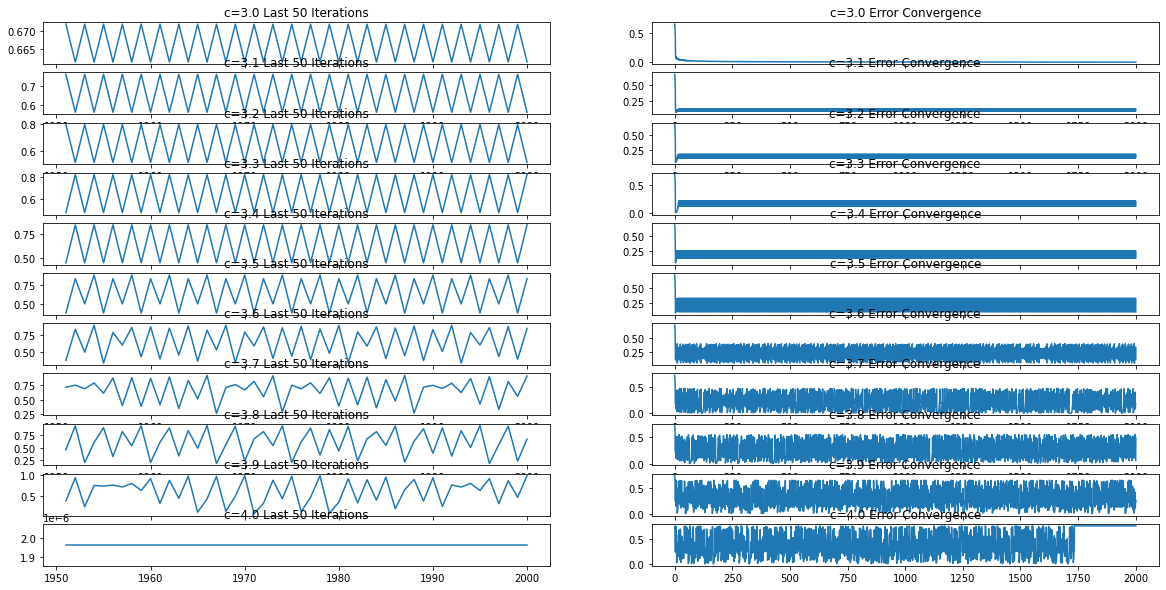

In [20]:
import pandas as pd
# Last 50 iterations of the map of c=3 (of 1000 iterations)
fig, ax = plt.subplots(11,2, figsize=(20,10))
df = pd.DataFrame()

for i in range(0,11):
    fx, fx_errors = hw2.logistic_map(3+(i/10.),0.01, n=2000)
    if (len(fx)!=2000):
        fx = fx + [fx[-1]]*(2001-len(fx))
        fx_errors = fx_errors + [fx_errors[-1]]*(2001-len(fx_errors))
    df["c="+str(3+(i/10.))+"_iter"]=fx
    df["c="+str(3+(i/10.))+"_errors"]=fx_errors

    x = np.arange(0, len(fx), 1)
    ax[i,0].plot(x[-50:], fx[-50:])
    ax[i,1].plot(x, fx_errors)

    ax[i,0].set_title("c="+str(3+(i/10.))+" Last 50 Iterations")
    ax[i,1].set_title("c="+str(3+(i/10.))+" Error Convergence")
plt.show()
df_errors = df.filter(regex='errors$', axis=1)
df_iter = df.filter(regex='iter$', axis=1)

In [24]:
df["c=4.0_iter"][-50:]

1951    0.000002
1952    0.000002
1953    0.000002
1954    0.000002
1955    0.000002
1956    0.000002
1957    0.000002
1958    0.000002
1959    0.000002
1960    0.000002
1961    0.000002
1962    0.000002
1963    0.000002
1964    0.000002
1965    0.000002
1966    0.000002
1967    0.000002
1968    0.000002
1969    0.000002
1970    0.000002
1971    0.000002
1972    0.000002
1973    0.000002
1974    0.000002
1975    0.000002
1976    0.000002
1977    0.000002
1978    0.000002
1979    0.000002
1980    0.000002
1981    0.000002
1982    0.000002
1983    0.000002
1984    0.000002
1985    0.000002
1986    0.000002
1987    0.000002
1988    0.000002
1989    0.000002
1990    0.000002
1991    0.000002
1992    0.000002
1993    0.000002
1994    0.000002
1995    0.000002
1996    0.000002
1997    0.000002
1998    0.000002
1999    0.000002
2000    0.000002
Name: c=4.0_iter, dtype: float64

In [44]:
df_iter[900:]

,c=3.0_iter,c=3.1_iter,c=3.2_iter,c=3.3_iter,c=3.4_iter,c=3.5_iter,c=3.6_iter,c=3.7_iter,c=3.8_iter,c=3.9_iter,c=4.0_iter
900,0.658755,0.558014,0.513045,0.823603,0.842154,0.826941,0.888188,0.715659,0.765488,0.271032,0.904093
901,0.674390,0.764567,0.799455,0.479427,0.451963,0.500884,0.357517,0.752918,0.682162,0.770537,0.346835
902,0.658764,0.558014,0.513045,0.823603,0.842154,0.874997,0.826915,0.688320,0.823904,0.689559,0.906162
903,0.674382,0.764567,0.799455,0.479427,0.451963,0.382820,0.515256,0.793781,0.551326,0.834863,0.340129
904,0.658773,0.558014,0.513045,0.823603,0.842154,0.826941,0.899162,0.605662,0.939989,0.537679,0.897765
...,...,...,...,...,...,...,...,...,...,...,...
996,0.659147,0.558014,0.513045,0.823603,0.842154,0.826941,0.892400,0.474200,0.835493,0.487903,0.446454
997,0.674016,0.764567,0.799455,0.479427,0.451963,0.500884,0.345679,0.922537,0.522289,0.974429,0.988531
998,0.659155,0.558014,0.513045,0.823603,0.842154,0.874997,0.814266,0.264411,0.948112,0.097176,0.045349
999,0.674009,0.764567,0.799455,0.479427,0.451963,0.382820,0.544453,0.719641,0.186943,0.342158,0.173169


In [38]:
df_errors

,c=3.0_errors,c=3.1_errors,c=3.2_errors,c=3.3_errors,c=3.4_errors,c=3.5_errors,c=3.6_errors,c=3.7_errors,c=3.8_errors,c=3.9_errors,c=4.0_errors
0,0.656667,0.667419,0.677500,0.686970,0.695882,0.704286,0.712222,0.719730,0.726842,0.733590,0.740000
1,0.636967,0.646729,0.655820,0.664300,0.672222,0.679636,0.686582,0.693100,0.699222,0.704980,0.710400
2,0.580213,0.585200,0.589336,0.592681,0.595291,0.597213,0.598491,0.599163,0.599264,0.598825,0.597873
3,0.429728,0.417903,0.404210,0.388708,0.371454,0.352502,0.331904,0.309710,0.285971,0.260738,0.234061
4,0.124271,0.081700,0.037782,0.006711,0.050910,0.093851,0.134470,0.171602,0.203986,0.230263,0.248984
...,...,...,...,...,...,...,...,...,...,...,...
996,0.007519,0.119405,0.174455,0.126634,0.136272,0.112655,0.170178,0.255529,0.098651,0.255687,0.303546
997,0.007350,0.087147,0.111955,0.217543,0.253919,0.213402,0.376543,0.192807,0.214553,0.230840,0.238531
998,0.007512,0.119405,0.174455,0.126634,0.136272,0.160712,0.092044,0.465319,0.211270,0.646414,0.704651
999,0.007342,0.087147,0.111955,0.217543,0.253919,0.331466,0.177770,0.010089,0.549899,0.401432,0.576831


**(b)** Plotting the error convergence on the interval $c: [3.0, 4.0]$ reveals the apparent lack of exponentially quick convergence that we observed with the Babylonian algorithm or even c=2. The table "df_errors" confirms the qualitatively consistent convergence of errors which invalidates the existence of a *superattractor* in the interval. Of course, we shouldn't expect a superattractor given that we know that for $c>3$ we will see stable m-cycles appear and therefore will not experience rapid convergence to a single value but rather an oscillation around one.

# LOGISTIC 3-CYCLE


In [30]:
fxx, fxx_errors = hw2.logistic_map(4,0.03)
fxx[-100:]

[0.5098828716343181,
 0.9996093153930383,
 0.0015621278899982432,
 0.006238750585814132,
 0.024799314307768543,
 0.0967372332705322,
 0.34951656387877933,
 0.909418941812602,
 0.329504520340197,
 0.8837251656622949,
 0.4110199889497774,
 0.9683302305340091,
 0.12266718067184745,
 0.4304797738314711,
 0.9806677526139063,
 0.07583404638838644,
 0.28033297518700195,
 0.8069855928392228,
 0.6230393831566038,
 0.9394452407697698,
 0.22755152145919633,
 0.7030873061632049,
 0.8350221843014907,
 0.5510405441034321,
 0.9895794514305024,
 0.041247842948033325,
 0.15818583360067082,
 0.5326523025949268,
 0.9957353085409973,
 0.016986015463048666,
 0.06678996296695094,
 0.24931625525529708,
 0.7486306404830905,
 0.7527312184518729,
 0.7445077248793269,
 0.7608638898973414,
 0.7278001237905108,
 0.7924284144041117,
 0.6579424897963885,
 0.9002166796676709,
 0.3593064372631395,
 0.9208212856176364,
 0.2916377822844786,
 0.8263407449146786,
 0.5740068728341308,
 0.9780919310932512,
 0.08571242169410